In [1]:
!git clone https://github.com/sevamoo/SOMPY.git

Cloning into 'SOMPY'...
remote: Enumerating objects: 947, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 947 (delta 20), reused 27 (delta 15), pack-reused 906 (from 1)
Receiving objects: 100% (947/947), 10.15 MiB | 22.01 MiB/s, done.
Resolving deltas: 100% (512/512), done.


In [2]:
!pip install ipdb
!pip install numexpr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00


In [3]:
import sys
sys.path.append('/content/SOMPY')  # Add the SOMPY folder to the Python path

import sompy  # Now you can import sompy

NumExpr defaulting to 2 threads.


In [4]:
from IPython.display import YouTubeVideo

from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

from sompy.sompy import SOM
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('df_PCA.csv',delimiter=',')

In [6]:
df.set_index('customer_id',inplace=True)

In [7]:
np.random.seed(42)

A saída de streaming foi truncada nas últimas 5000 linhas.
 epoch: 142 ---> elapsed time:  0.117000, quantization error: 2.869143

 epoch: 143 ---> elapsed time:  0.161000, quantization error: 2.869143

 epoch: 144 ---> elapsed time:  0.143000, quantization error: 2.869143

 epoch: 145 ---> elapsed time:  0.144000, quantization error: 2.869143

 epoch: 146 ---> elapsed time:  0.143000, quantization error: 2.869143

 epoch: 147 ---> elapsed time:  0.141000, quantization error: 2.869143

 epoch: 148 ---> elapsed time:  0.154000, quantization error: 2.869143

 epoch: 149 ---> elapsed time:  0.114000, quantization error: 2.869143

 epoch: 150 ---> elapsed time:  0.116000, quantization error: 2.869143

 epoch: 151 ---> elapsed time:  0.118000, quantization error: 2.869143

 epoch: 152 ---> elapsed time:  0.155000, quantization error: 2.869143

 epoch: 153 ---> elapsed time:  0.143000, quantization error: 2.869143

 epoch: 154 ---> elapsed time:  0.143000, quantization error: 2.869143

 epoc

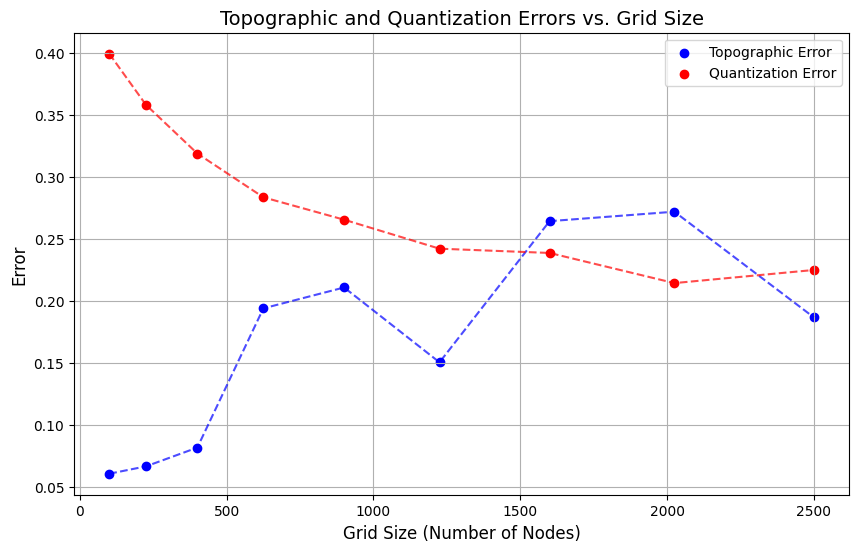

In [8]:
grid_sizes = [(10, 10), (15, 15), (20, 20), (25, 25), (30, 30),(35,35),(40,40),(45,45),(50,50)]
#

# Lists to store errors
topographic_errors = []
quantization_errors = []

# Train SOM for each grid size and record errors
for size in grid_sizes:
    sm = sompy.SOMFactory().build(
        df.values,
        mapsize=size,
        initialization='random',
        neighborhood='gaussian',
        training='batch',
        lattice='hexa'
    )
    sm.train(n_job=1, verbose='info', train_rough_len=100, train_finetune_len=200)

    # Collect errors
    topographic_errors.append(sm.calculate_topographic_error())
    quantization_errors.append(sm.calculate_quantization_error())

# Plotting
grid_sizes_flat = [s[0] * s[1] for s in grid_sizes]  # Flatten grid sizes into single values

plt.figure(figsize=(10, 6))

# Topographic error scatter plot
plt.scatter(grid_sizes_flat, topographic_errors, label="Topographic Error", color="blue")
plt.plot(grid_sizes_flat, topographic_errors, color="blue", linestyle="--", alpha=0.7)

# Quantization error scatter plot
plt.scatter(grid_sizes_flat, quantization_errors, label="Quantization Error", color="red")
plt.plot(grid_sizes_flat, quantization_errors, color="red", linestyle="--", alpha=0.7)

# Labels and Legend
plt.title("Topographic and Quantization Errors vs. Grid Size", fontsize=14)
plt.xlabel("Grid Size (Number of Nodes)", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [9]:

sm = sompy.SOMFactory().build(
    df.values,
    mapsize=[30, 30],
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=df.columns
)
sm.train(n_job=1, verbose='info', train_rough_len=500, train_finetune_len=2000)

 Training...
 random_initialization took: 0.002000 seconds
 Rough training...
 radius_ini: 10.000000 , radius_final: 1.666667, trainlen: 500

 epoch: 1 ---> elapsed time:  1.235000, quantization error: 9.361678

 epoch: 2 ---> elapsed time:  1.355000, quantization error: 3.969413

 epoch: 3 ---> elapsed time:  0.973000, quantization error: 3.957253

 epoch: 4 ---> elapsed time:  0.946000, quantization error: 3.939863

 epoch: 5 ---> elapsed time:  0.957000, quantization error: 3.931291

 epoch: 6 ---> elapsed time:  0.939000, quantization error: 3.927164

 epoch: 7 ---> elapsed time:  0.955000, quantization error: 3.924586

 epoch: 8 ---> elapsed time:  0.975000, quantization error: 3.923079

 epoch: 9 ---> elapsed time:  0.928000, quantization error: 3.922597

 epoch: 10 ---> elapsed time:  0.919000, quantization error: 3.922295

 epoch: 11 ---> elapsed time:  1.054000, quantization error: 3.922034

 epoch: 12 ---> elapsed time:  2.024000, quantization error: 3.921740

 epoch: 13 --->

KeyboardInterrupt: 

In [ ]:
from sompy.visualization.umatrix import UMatrixView

u_matrix = UMatrixView(width=10, height=10, title="U-Matrix")
u_matrix.show(sm, distance=2.0, row_normalized=False, show_data=True, contour=True)

In [ ]:
from sompy.visualization.hitmap import HitMapView

hits = HitMapView(30, 30, "Hit Map", text_size=12)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="coolwarm")

In [ ]:
from sompy.visualization.mapview import View2D

view2d = View2D(30, 30, "Component Planes", text_size=12)
view2d.show(sm, col_sz=4, which_dim="all")